In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


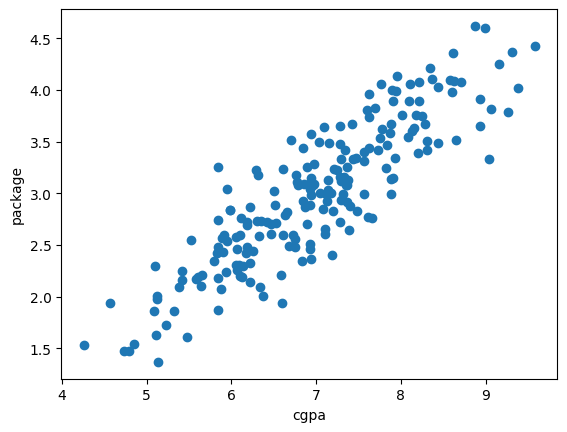

In [44]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df[['cgpa']], df['package'], test_size=0.2, random_state=42)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
pred = lr.predict(X_test)

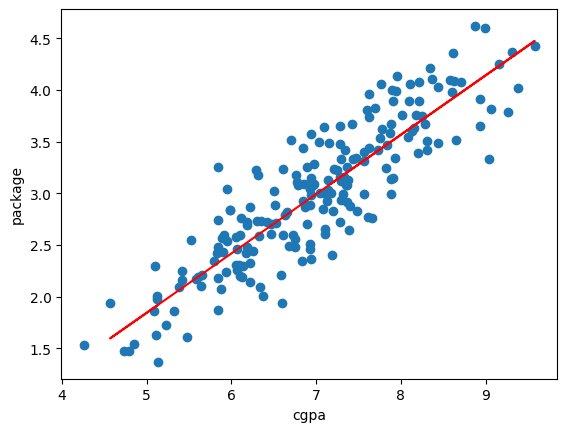

In [48]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
print('mean absolute error: ', mean_absolute_error(y_test, pred))
print('mean squared error: ', mean_squared_error(y_test, pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('r2 score: ', r2_score(y_test, pred))
print('adjusted r2 score: ', 1 - (1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean absolute error:  0.23150985393278373
mean squared error:  0.08417638361329656
root mean squared error:  0.2901316659954521
r2 score:  0.7730984312051673
adjusted r2 score:  0.7671273372895138


In [51]:
# Randomly adding a column to check r2 and adjusted r2

new_df1 = df.copy()
new_df1['random'] = np.random.random(200)
new_df1.head()

,cgpa,package,random
0,6.89,3.26,0.290687
1,5.12,1.98,0.643519
2,7.82,3.25,0.488485
3,7.42,3.67,0.755951
4,6.94,3.57,0.371818


In [52]:
new_df1.shape

(200, 3)

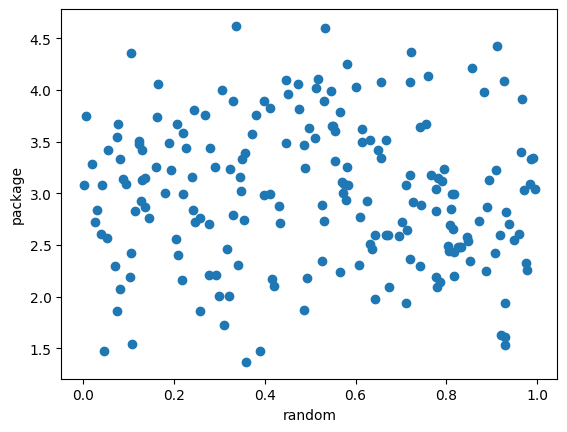

In [53]:
plt.scatter(new_df1['random'], new_df1['package'])
plt.xlabel('random')
plt.ylabel('package')
plt.show()

In [54]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [57]:
print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score: ', r2_score(y_test, y_pred))
print('adjusted r2 score: ', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean absolute error:  0.2655352216200386
mean squared error:  0.09276708516660133
root mean squared error:  0.3045768953262892
r2 score:  -0.06204511972387072
adjusted r2 score:  -0.1194529640332691
